# Zipf's Law - Amit Ozer

# Zipf's Law: Word Frequencies in Natural Language

**Zipf’s Law** states that in many natural datasets, such as language, the frequency of any word is inversely proportional to its rank in the frequency table. In simpler terms, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent, and so on.

In this notebook, we'll explore Zipf's Law using a real text dataset, visualize it, and understand how well it fits real data.

## ⚛️ Zipf’s Law in Physics and Complex Systems

Zipf’s Law isn't just a linguistic curiosity — it belongs to a broader class of **power-law distributions** found across many domains of physics and complex systems.

### 🔬 Examples in Physics:
- **Earthquake Magnitudes**: The Gutenberg–Richter law is a power-law distribution of earthquake sizes.
- **Energy Dissipation in Turbulence**: Intermittency causes energy dissipation events to follow heavy-tailed distributions.
- **Particle Energy Spectra**: Cosmic rays and particle decay events often follow power-law distributions.
- **Critical Phenomena**: Near phase transitions, physical systems show **scale-invariance** and observables often follow power-laws.
- **Fractals and Self-Similarity**: Systems with fractal geometry exhibit power-law relationships between structure size and frequency.

### 🧠 Why Does This Happen?
Zipf-like laws emerge in systems where:
- Many small events coexist with a few very large ones.
- There's no characteristic scale — i.e., **scale-free** behavior.
- The system is governed by **self-organized criticality** or **preferential attachment** mechanisms.

These are central ideas in **statistical mechanics**, **non-equilibrium thermodynamics**, and **complex systems**.

In the next cells, we'll simulate a physical process that generates a power-law.



## Review on power laws:
### Power law distribution
* Special kind of probability distribution
$$P(x) = C x^{-\alpha}\quad \text{for} \quad x \geqslant x_{min} > 0$$

where C is a normalization constant makes $\int_{x_{min}}^{\infty} P(x) dx = 1$.

after quick algebra we found out:
$C = (\alpha-1)/x_{min}^{1-\alpha}$

notice that:
$$\log{P(x)} = -\alpha \log{x} + \log{C}$$
therefore, in log-log plot we get linear distribution for P(x)

## Code Examples:
### word frequencies in Gutenberg's book
in the first segment of code we will show that the Gutenberg's book's words frequencies matches the zipf's law principle.


####Libraries installation:

In [2]:
!pip install nltk matplotlib seaborn powerlaw

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd
import powerlaw
import string

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


####show zipf's law on the data

Total tokens (after cleaning): 69689
Estimated power law exponent (alpha): 1.24
Intercept: 10.87


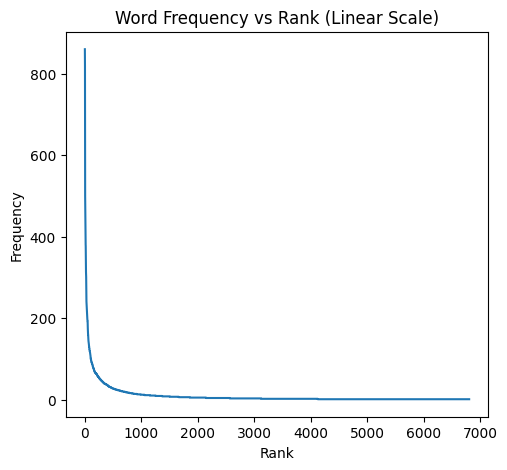

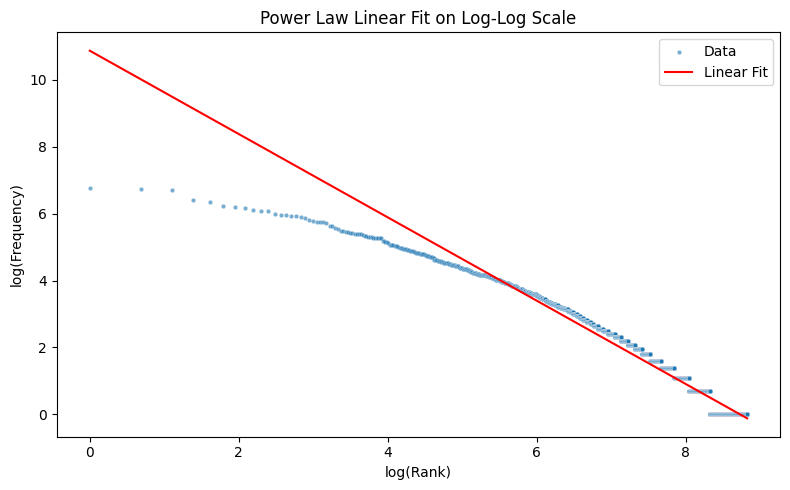

In [3]:
# Load a book from Gutenberg corpus
text = gutenberg.raw('austen-emma.txt')

# Tokenize
tokens = word_tokenize(text.lower())

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

print(f"Total tokens (after cleaning): {len(tokens)}")

# Count frequencies
freq_dist = Counter(tokens)

# Convert to DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['word', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
freq_df['rank'] = freq_df.index + 1

# Show top 10
freq_df.head(10)


plt.figure(figsize=(12, 5))

# Linear plot
plt.subplot(1, 2, 1)
sns.lineplot(x='rank', y='frequency', data=freq_df)
plt.title("Word Frequency vs Rank (Linear Scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency")


# Manual linear fit on log-log scale
# Remove any zero frequencies to avoid log(0)
log_df = freq_df[freq_df['frequency'] > 0].copy()
log_df['log_rank'] = np.log(log_df['rank'])
log_df['log_frequency'] = np.log(log_df['frequency'])

# Fit a linear model: log(frequency) = a * log(rank) + b
slope, intercept = np.polyfit(log_df['log_rank'], log_df['log_frequency'], 1)

print(f"Estimated power law exponent (alpha): {-slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Plot log-log with linear fit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='log_rank', y='log_frequency', data=log_df, s=10, alpha=0.6, label='Data')
plt.plot(log_df['log_rank'], slope * log_df['log_rank'] + intercept, color='red', label='Linear Fit')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('Power Law Linear Fit on Log-Log Scale')
plt.legend()
plt.tight_layout()
plt.show()



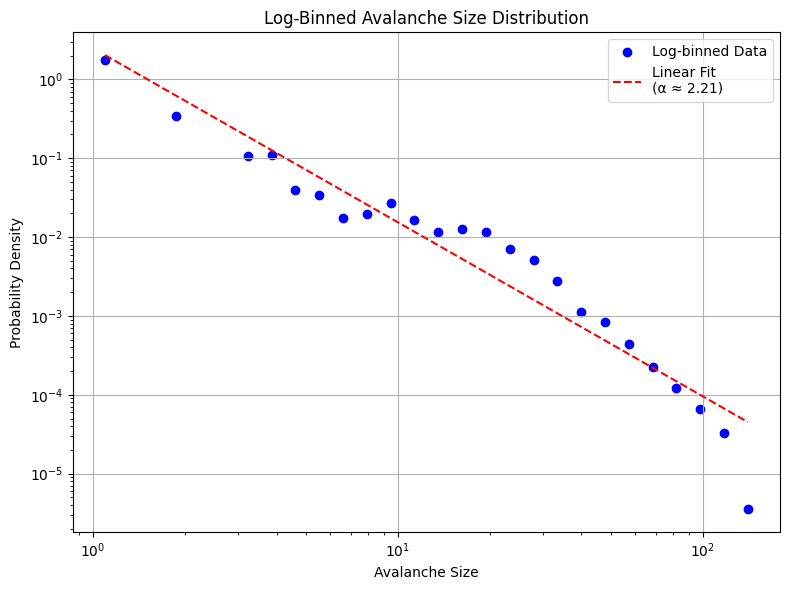

Estimated power-law exponent (alpha): 2.21
R-squared of fit: 0.9274


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import linregress

def simulate_sandpile(n_grains=200000, critical_slope=4):
    size = 200
    heights = [0] * size
    avalanches = []

    for _ in range(n_grains):
        drop_site = random.randint(1, size - 2)
        heights[drop_site] += 1

        avalanche_size = 0
        unstable = True
        while unstable:
            unstable = False
            for i in range(1, size - 1):
                slope_left = heights[i] - heights[i - 1]
                slope_right = heights[i] - heights[i + 1]
                if slope_left > critical_slope or slope_right > critical_slope:
                    heights[i] -= 2
                    heights[i - 1] += 1
                    heights[i + 1] += 1
                    avalanche_size += 1
                    unstable = True

        if avalanche_size > 0:
            avalanches.append(avalanche_size)

    return avalanches

# ---- Simulate ----
avalanches = simulate_sandpile()

# ---- Logarithmic Binning ----
bins = np.logspace(np.log10(1), np.log10(max(avalanches)), 30)
hist, bin_edges = np.histogram(avalanches, bins=bins, density=True)

# Bin centers for plotting
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

# Filter zeros (to avoid log(0))
nonzero = hist > 0
log_bin_centers = np.log10(bin_centers[nonzero])
log_hist = np.log10(hist[nonzero])

# ---- Linear Fit on Log-Log Data ----
slope, intercept, r_value, _, _ = linregress(log_bin_centers, log_hist)
alpha = -slope  # Power-law exponent

# Predicted line
log_x_fit = np.linspace(log_bin_centers.min(), log_bin_centers.max(), 100)
log_y_fit = slope * log_x_fit + intercept

# ---- Plot ----
plt.figure(figsize=(8, 6))
plt.scatter(bin_centers[nonzero], hist[nonzero], color='blue', label='Log-binned Data')
plt.plot(10**log_x_fit, 10**log_y_fit, 'r--', label=f'Linear Fit\n(α ≈ {alpha:.2f})')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Avalanche Size")
plt.ylabel("Probability Density")
plt.title("Log-Binned Avalanche Size Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Print Result ----
print(f"Estimated power-law exponent (alpha): {alpha:.2f}")
print(f"R-squared of fit: {r_value**2:.4f}")

####SSR Process
the simple sample space reducing (SSR) process could be illustrated by a set of N fair dice with different number of faces. The first has one face, the second has two faces and so on to the N-th that has N faces. To start the process we take the dice with N faces and throw it, getting a result K. Then we throw the dice with K-1 faces getting a new result. Once we reach the dice with one face we restart the process by throwing the N-faced dice again. In an equivalent way, we can interpret the process considering a staircase with N steps: imagine a ball that randomly falls downstairs but never can climb to higher levels. The ball first hits any of the N steps with uniform probability,  PN(i)=1/N  ,  i=1…N  . Then it can only fall down to a lower level with uniform probability and so on until it reaches the bottom step. Once landed on the first step, it restart jumping randomly to any of the steps. SSR and the occupation probability, i.e. how often a given site i is occupied on average should be:

P(i)=ci

Fit the histogram For checking whether your result obeys  P(i)=ci  or not, please find the exponent by polynomial fit.

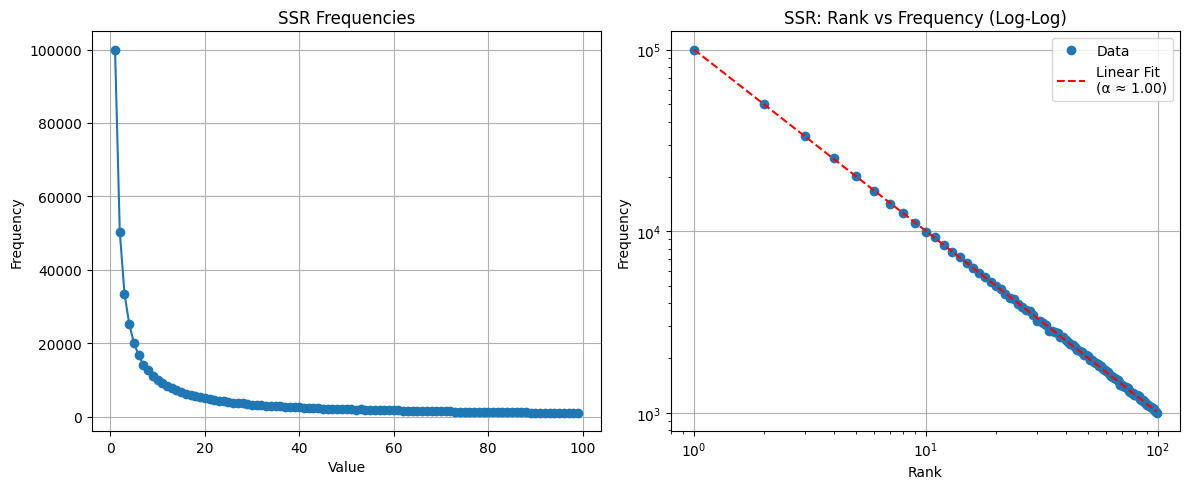

Estimated power-law exponent (alpha): 1.00
R-squared: 0.9998


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from scipy.stats import linregress

# ---- SSR Simulation Function ----
def simulate_ssr(N=100, runs=100000):
    hits = []
    for _ in range(runs):
        k = N
        while k > 1:
            k = np.random.randint(1, k)
            hits.append(k)
    return Counter(hits)

# ---- Simulate SSR ----
N = 100
runs = 100000
counts = simulate_ssr(N=N, runs=runs)

# Convert to DataFrame and sort
freq_df = pd.DataFrame(sorted(counts.items()), columns=["value", "frequency"])
freq_df["rank"] = freq_df["frequency"].rank(method="first", ascending=False).astype(int)
freq_df = freq_df.sort_values("rank")

# ---- Log-log Linear Fit ----
# Filter out zeros to avoid log(0)
log_freq = np.log10(freq_df["frequency"])
log_rank = np.log10(freq_df["rank"])

# Linear regression on log-log
slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
alpha = -slope  # Zipf's law: freq ~ rank^(-alpha)

# Predicted line
log_rank_pred = np.linspace(log_rank.min(), log_rank.max(), 100)
log_freq_pred = slope * log_rank_pred + intercept

# ---- Plotting ----
plt.figure(figsize=(12, 5))

# Linear scale
plt.subplot(1, 2, 1)
plt.plot(freq_df["value"], freq_df["frequency"], marker='o')
plt.title("SSR Frequencies")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

# Log-log Zipf plot with linear fit
plt.subplot(1, 2, 2)
plt.loglog(freq_df["rank"], freq_df["frequency"], marker='o', linestyle='none', label="Data")
plt.plot(10**log_rank_pred, 10**log_freq_pred, color="red", linestyle="--", label=f"Linear Fit\n(α ≈ {alpha:.2f})")
plt.title("SSR: Rank vs Frequency (Log-Log)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ---- Print Fit Results ----
print(f"Estimated power-law exponent (alpha): {alpha:.2f}")
print(f"R-squared: {r_value**2:.4f}")

## 🔄 Connecting Zipf's Law and Physics

The **avalanche model** above simulates **self-organized criticality** — a key mechanism behind many power-law phenomena in physics.

### Similarities with Zipf's Law:
- Both show **no characteristic scale** — small and large events coexist.
- The distribution follows a **power-law** form: \( P(x) ∝ xᵅ \)
- In log-log plots, both exhibit straight lines.

### Final Thought:
Zipf's Law isn't just about words — it reflects **deep statistical patterns** found in nature. Whether it's words, earthquakes, or avalanches, the same principles help us understand complexity.
